In [ ]:
### TS_Stock_Price_forcast

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 8.0MB/s 
     |████████████████████████████████| 808kB 44.5MB/s 
     |████████████████████████████████| 2.1MB 46.2MB/s 
     |████████████████████████████████| 8.7MB 48.0MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: setuptools 50.3.0
    Uninstalling setuptools-50.3.0:
      Successfully uninstalled setuptools-50.3.0
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
#plt.style.use('fivethirtyeight')
#from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
data = pd.read_csv('/content/drive/My Drive/TS_Data/Company_Stock_and_Investment.csv')
data.head(50)

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013
5,08-01-2010,0.001269,-0.013097,0.006648,0.027077
6,11-01-2010,-0.002417,0.023297,-0.008822,-0.024041
7,12-01-2010,-0.021202,-0.001518,-0.011375,-0.022715
8,13-01-2010,-0.013987,-0.020847,0.014106,0.013820
9,14-01-2010,-0.003892,0.009758,-0.005792,-0.013632


In [ ]:
# data_com_stock = data.copy()
# data_com_stock=data_com_stock[['Date','Comp Stock']]
# data_com_stock

In [ ]:
data.dtypes

Date                        object
Oil Investments            float64
Gold Investments           float64
Comp Stock                 float64
Other sharesInvestments    float64
dtype: object

In [ ]:
data.isna().sum()

Date                       0
Oil Investments            0
Gold Investments           0
Comp Stock                 0
Other sharesInvestments    0
dtype: int64

In [ ]:
date_parser = lambda dates: pd.datetime.strptime(dates,'%d-%m-%Y')
time_data = pd.read_csv('/content/drive/My Drive/TS_Data/Company_Stock_and_Investment.csv',parse_dates=['Date'],index_col=['Date'],date_parser=date_parser)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


In [ ]:
time_data2 = pd.read_csv('/content/drive/My Drive/TS_Data/Company_Stock_and_Investment.csv',parse_dates=['Date'],date_parser=date_parser)
time_data2.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


Date                       datetime64[ns]
Oil Investments                   float64
Gold Investments                  float64
Comp Stock                        float64
Other sharesInvestments           float64
dtype: object

In [ ]:
time_data.head()

,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
Date,,,,
2009-12-31,0.025417,0.000150,0.017354,0.006848
2010-01-04,0.026830,0.001097,0.015565,-0.004609
2010-01-05,0.002699,0.001560,0.001729,0.005900
2010-01-06,0.021688,0.006009,-0.015906,-0.018116
2010-01-07,-0.006256,0.000221,-0.001849,-0.017013


In [ ]:
time_data1 = time_data[['Comp Stock']]

In [ ]:
time_data1.head()

,Comp Stock
Date,
2009-12-31,0.017354
2010-01-04,0.015565
2010-01-05,0.001729
2010-01-06,-0.015906
2010-01-07,-0.001849


In [ ]:
from statsmodels.tsa.stattools import adfuller

test_result=adfuller(time_data1)

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [ ]:
adfuller_test(time_data1)

ADF Test Statistic : -12.473386265908271
p-value : 3.2077742930895363e-23
#Lags Used : 12
Number of Observations Used : 1971
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [ ]:
time_data1['Sales First Difference'] = time_data1 - time_data1.shift(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
time_data1.shift(1).head() # its shift one down

,Comp Stock,Sales First Difference
Date,,
2009-12-31,NaN,NaN
2010-01-04,0.017354,NaN
2010-01-05,0.015565,-0.001789
2010-01-06,0.001729,-0.013836
2010-01-07,-0.015906,-0.017635


In [ ]:
time_data1['Seasonal First Difference']=time_data1['Comp Stock']-time_data1['Comp Stock'].shift(12) 
#as seasonal its a 12 month data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
time_data1.head(14) #when subtracted with nan we get a nan

,Comp Stock,Sales First Difference,Seasonal First Difference
Date,,,
2009-12-31,0.017354,NaN,NaN
2010-01-04,0.015565,-0.001789,NaN
2010-01-05,0.001729,-0.013836,NaN
2010-01-06,-0.015906,-0.017635,NaN
2010-01-07,-0.001849,0.014058,NaN
2010-01-08,0.006648,0.008497,NaN
2010-01-11,-0.008822,-0.015470,NaN
2010-01-12,-0.011375,-0.002553,NaN
2010-01-13,0.014106,0.025481,NaN


In [ ]:
## Again test dickey fuller test
adfuller_test(time_data1['Seasonal First Difference'].dropna())

ADF Test Statistic : -13.237747334397202
p-value : 9.304187972233725e-25
#Lags Used : 26
Number of Observations Used : 1945
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


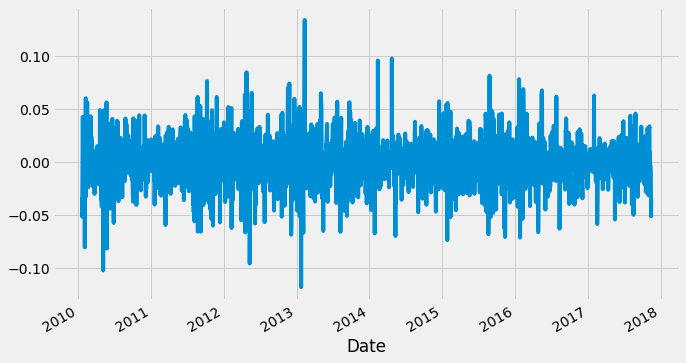

In [ ]:
time_data1['Seasonal First Difference'].plot()

# Auto Regressive Model

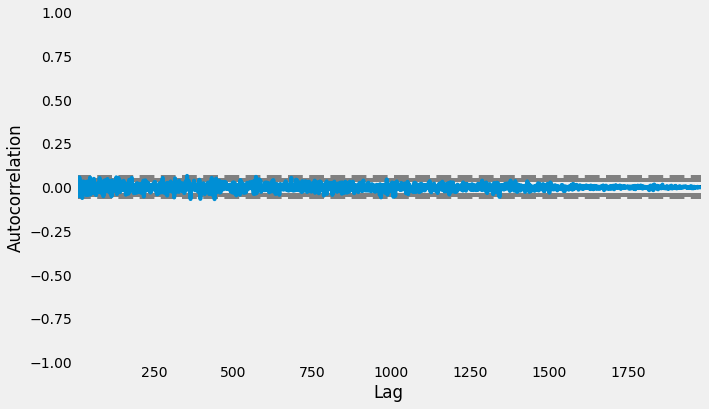

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(time_data1['Comp Stock'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm 

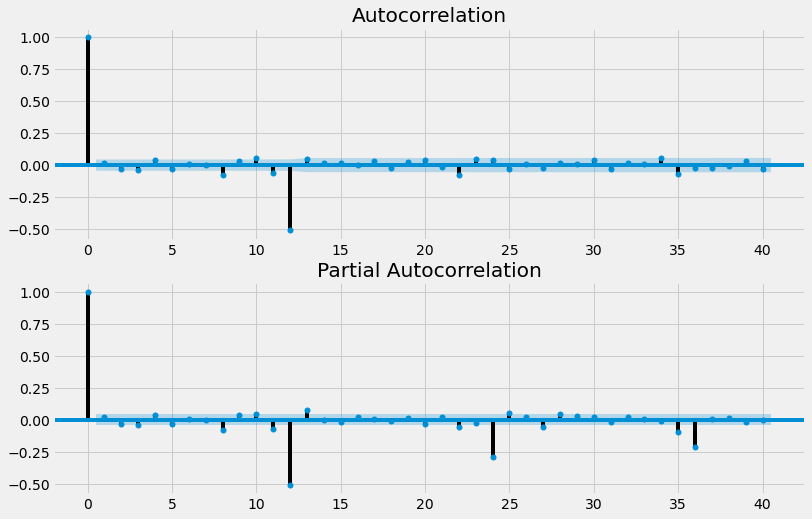

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(time_data1['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(time_data1['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
# Usually in seasonal data we avoid arima ,just showing u how to impliment
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(time_data1['Comp Stock'],order=(1,1,1)) # this order is p d q(0 or 1) 
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Comp Stock   No. Observations:                 1983
Model:                 ARIMA(1, 1, 1)   Log Likelihood                5373.983
Method:                       css-mle   S.D. of innovations              0.016
Date:                Thu, 22 Oct 2020   AIC                         -10739.966
Time:                        20:34:06   BIC                         -10717.597
Sample:                             1   HQIC                        -10731.749
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -9.078e-08    6.5e-06     -0.014      0.989   -1.28e-05    1.26e-05
ar.L1.D.Comp Stock     0.0284      0.023      1.217      0.224      -0.017       0.074
ma.L1.D.Comp Stock    -0.9831      0.013    -73.360      0.000      -1.009      -0.957
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           35.2592           +0.0000j           35.2592            0.0000
MA.1            1.0172           +0.0000j            1.0172            0.0000
-----------------------------------------------------------------------------
"""

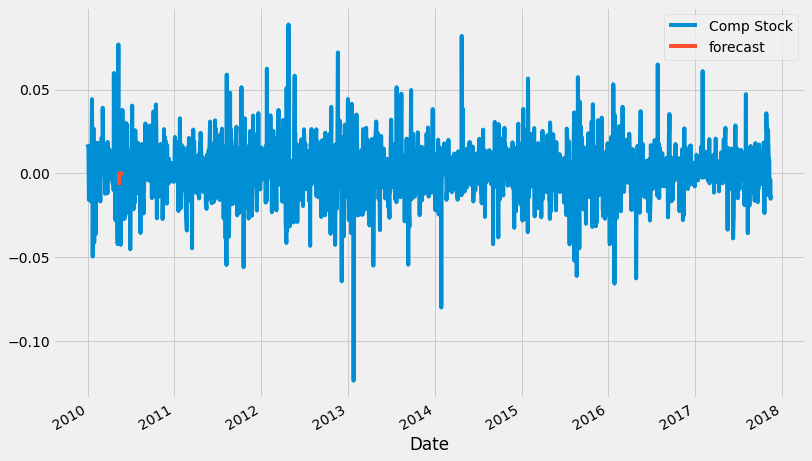

In [ ]:
time_data1['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
time_data1[['Comp Stock','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax

In [ ]:
model=sm.tsa.statespace.SARIMAX(time_data1['Comp Stock'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


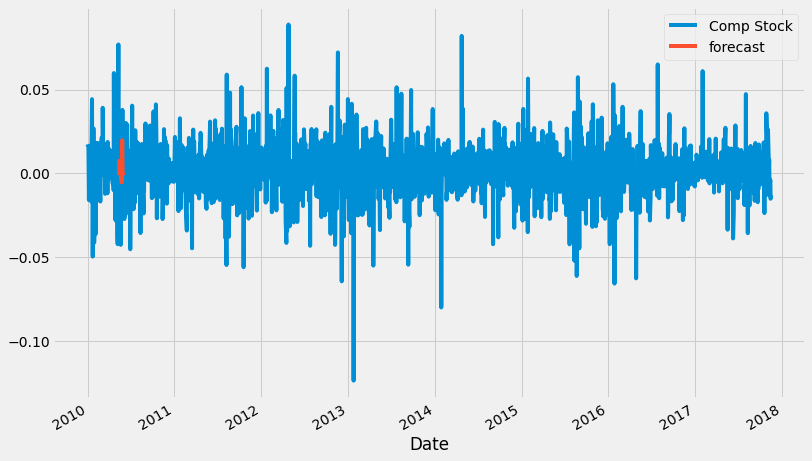

In [ ]:
time_data1['forecast']=results.predict(start=90,end=103,dynamic=True)
time_data1[['Comp Stock','forecast']].plot(figsize=(12,8))

In [ ]:
time_data1_df = time_data1.copy()

In [ ]:
time_data1_df.reset_index(inplace=True)

In [ ]:
time_data1_df.dtypes

Date                         datetime64[ns]
Comp Stock                          float64
Sales First Difference              float64
Seasonal First Difference           float64
forecast                            float64
dtype: object

# create data for forecast

In [ ]:
#creating some data to predict future of this.
from datetime import timedelta
from pandas.tseries.offsets import DateOffset

#future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

time_data1_df = time_data1_df.append(pd.DataFrame({'Date': pd.date_range(start=time_data1_df.Date.iloc[-1],end='2021-12-31')}))

# ftr =  (df['date'] + pd.Timedelta(4, unit='days')).to_frame()
# ftr['Monthly Value'] = None


In [ ]:
time_data1_df

,Date,Comp Stock,Sales First Difference,Seasonal First Difference,forecast
0,2009-12-31,0.017354,NaN,NaN,NaN
1,2010-01-04,0.015565,-0.001789,NaN,NaN
2,2010-01-05,0.001729,-0.013836,NaN,NaN
3,2010-01-06,-0.015906,-0.017635,NaN,NaN
4,2010-01-07,-0.001849,0.014058,NaN,NaN
...,...,...,...,...,...
1503,2021-12-27,NaN,NaN,NaN,NaN
1504,2021-12-28,NaN,NaN,NaN,NaN
1505,2021-12-29,NaN,NaN,NaN,NaN
1506,2021-12-30,NaN,NaN,NaN,NaN


In [ ]:
time_data1_df.set_index('Date',inplace=True)

In [ ]:
time_data1_df.tail()

,Comp Stock,Sales First Difference,Seasonal First Difference,forecast
Date,,,,
2021-12-27,NaN,NaN,NaN,NaN
2021-12-28,NaN,NaN,NaN,NaN
2021-12-29,NaN,NaN,NaN,NaN
2021-12-30,NaN,NaN,NaN,NaN
2021-12-31,NaN,NaN,NaN,NaN


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


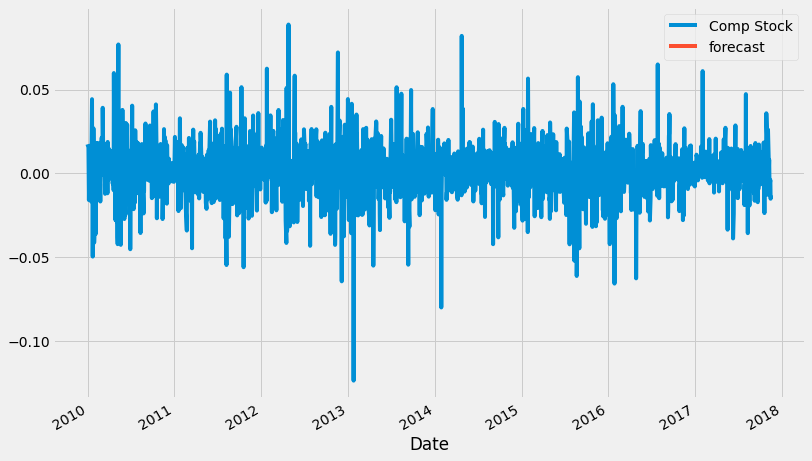

In [ ]:
time_data1_df['forecast'] = results.predict(start = 1500, end =3491 , dynamic= True)  
time_data1_df[['Comp Stock', 'forecast']].plot(figsize=(12, 8)) 

In [ ]:
pd.date_range(start='2017-11-15', end='2021-12-31')